In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import config
import clr_callback
import learningratefinder

In [ ]:
ls

clr_callback.py  img_generator.py       __pycache__/    train.py
config.py        learningratefinder.py  sample_data/
drive/           predictions.py         train_colab.py


In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
print(config.DATASET_PATH_COLAB)

/content/drive/My Drive/Group_Classification/input/Training


In [ ]:
print(config.CLASSES)

['MUD', 'NOT MUD']


In [ ]:
#setting agg as bg as this will save the imgs in the bg
import matplotlib
matplotlib.use("Agg")

#importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from learningratefinder import LearningRateFinder
from clr_callback import CyclicLR
import config
from imutils import paths
import matplotlib.pyplot as plt 
import numpy as np
import argparse
import pickle
import cv2
import sys
import os


# ap = argparse.ArgumentParser()
# ap.add_argument("-f", "--lr-find", type=int , default= 0,
#                 help="whether or not to find optimal learning rate")

# args = vars(ap.parse_args())
args={}
args["lr_find"] = 1


print("[INFO] LOADING IMAGES...")
imagePaths = list(paths.list_images(config.DATASET_PATH_COLAB))
# print(imagePaths)
data = []
labels = []

i = 0
#looping over imagePaths
for imagePath in imagePaths:
    #extract the class label
    # print(imagePath)
    label = imagePath.split(os.path.sep)[-2]
    # print(label)
    
    #loading the image, converting it to RGB channel, and resize
    #to be fixed at 224*224 
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (512,512))

    #update the data ans labels lists 
    data.append(image)
    labels.append(label)
    # print(data)
    if i %100 ==0:
        print(i)
    i+= 1
    # break
#converting the data and labels tp numpy array
print("[INFO] PROCESSING DATA...")
data = np.array(data, dtype="float32")
labels = np.array(labels)

#perform one-hot encoding on the labels 


# print(labels[0])

[INFO] LOADING IMAGES...
0
100
200
300
400
500
[INFO] PROCESSING DATA...


In [ ]:
print(labels)

['MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD'
 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'MUD' 'M

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels.shape)

(599, 1)


In [ ]:
data.shape

(599, 1024, 1024, 3)

In [ ]:

#partition the data into training and testing 
(trainX, testX, trainY, testY) = train_test_split(data,
                                                 labels,
                                                 test_size=config.TEST_SPLIT,
                                                 random_state = 42)
                                            

#preparing the validation split from the training split
(trainX, valX, trainY, valY) = train_test_split(trainX,
                                                trainY,
                                                test_size = config.VAL_SPLIT,
                                                random_state = 84)

#initialize the training data augmentation object 

aug = ImageDataGenerator(
            rotation_range= 30,
            zoom_range = 0.15,
            width_shift_range= 0.2,
            height_shift_range= 0.2,
            shear_range= 0.15,
            horizontal_flip= True,
            fill_mode="nearest")
    



In [ ]:
trainX.shape

In [ ]:
trainY.shape

In [ ]:
args["lr_find"] = 0

In [ ]:
# y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
# y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152

In [ ]:
print(config.BATHC_SIZE)

32


In [ ]:
with tf.device("/gpu:0"):
    #loading the model 
    basemodel = ResNet50(weights= "imagenet",
                    include_top= False,
                    input_tensor = Input(shape=(224,224,3))
                    )

    #headmodel which will be placed on basemodel            
    headmodel = basemodel.output
    headmodel = Flatten(name="Flatten")(headmodel)
    headmodel = Dense(512, activation="relu")(headmodel)
    headmodel = Dropout(0.5)(headmodel)
    headmodel = Dense(1, activation="sigmoid")(headmodel)

    #placing the headmodel on top of the base model
    model = Model(inputs=basemodel.input, outputs=headmodel)

    #freezing the layers of the basemodel
    for layer in basemodel.layers:
        layer.trainable = False

    print("[INFO] COMPILING MODEL ...")

    opt = SGD(lr = config.MIN_LR, momentum= 0.9)
    model.compile(loss = "binary_crossentropy",
                optimizer = opt,
                metrics = ["accuracy"])

    #cheacking whether we have to perform finding optimal rate
    if args["lr_find"] > 0:
        print("[INFO] finding learning rate...")
        lrf = LearningRateFinder(model)
        lrf.find(
            aug.flow(trainX, trainY, batch_size= config.BATHC_SIZE),
            1e-10, 1e+1,
            stepsPerEpoch= np.ceil((trainX.shape[0]/float(config.BATHC_SIZE))),
            epochs= 20,
            batchSize= config.BATHC_SIZE
        )

        #plotting the loss for various lrs
        lrf.plot_loss()
        plt.savefig("/content/drive/My Drive/Group_Classification/output/LRFIND_PLOT2.png")

        #exiting the script so as to change the lrs in the config file
        print("[INFO] learning rate finder complete")
        print("[INFO] examine plots and adjust learning rates before training")

        #exit the script
        sys.exit(0)

    stepsize = config.STEP_SIZE *(trainX.shape[0] // config.BATHC_SIZE)
    clr =  CyclicLR(
        mode= config.CLR_METHOD,
        base_lr=1e-5,
        max_lr=1e-3,
        step_size= stepsize
    )


    print(["[INFO] training netwrok..."])
    H = model.fit(
            aug.flow(trainX, trainY, batch_size= config.BATHC_SIZE),
            validation_data = (valX, valY),
            steps_per_epoch = trainX.shape[0] // config.BATHC_SIZE,
            epochs = 50,
            callbacks = [clr]
            # verbose = 1
    )


    print("[INFO] EVALUATING THE NETWORK...")

    predictions = model.predict(testX, batch_size = config.BATHC_SIZE)

    # print(classification_report(testY.argmax(axis =1),
    #     predictions.argmax(axis =1),
    #     target_names = config.CLASSES))

    print("[INFO] SERIALIZING NETWROK TO {} .... ".format(config.MODEL_PATH))
    model.save(config.MODEL_PATH_COLAB)    


    #plot that plots and saves the training history
    # N = np.arange(0, 40)
    # plt.style.use("ggplot")
    # plt.figure()
    # plt.plot(N, H.history["loss"], label= "train_loss")
    # plt.plot(N, H.history["val_loss"], label = "val_loss")
    # plt.plot(N, H.history["accuracy"], label = "train_acc")
    # plt.plot(N, H.history["val_accuracy"], label = "val_acc")
    # plt.title("Training Loss and Accuracy")
    # plt.ylabel("Loss / Accuracy")
    # plt.xlabel("Epoch #")
    # plt.legend(loc = "lower left")
    # plt.savefig(config.TRAINING_PLOT_PATH)


    # plot the learning rate history
    N = np.arange(0, len(clr.history["lr"]))
    plt.figure()
    plt.plot(N, clr.history["lr"])
    plt.title("Cyclical Learning Rate (CLR)")
    plt.xlabel("Training Iterations")
    plt.ylabel("Learning Rate")
    plt.savefig(config.CLR_PLOT_PATH)

[INFO] COMPILING MODEL ...
['[INFO] training netwrok...']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
12/12 [==============================] - 8s 455ms/step - loss: 1.0879 - accuracy: 0.6129 - val_loss: 0.5030 - val_accuracy: 0.6889
Epoch 2/50
12/12 [==============================] - 4s 345ms/step - loss: 0.9110 - accuracy: 0.6613 - val_loss: 0.4094 - val_accuracy: 0.7556
Epoch 3/50
12/12 [==============================] - 4s 344ms/step - loss: 0.9501 - accuracy: 0.6344 - val_loss: 0.7366 - val_accuracy: 0.7111
Epoch 4/50
12/12 [==============================] - 4s 351ms/step - loss: 0.7977 - accuracy: 0.6855 - val_loss: 0.6678 - val_accuracy: 0.7111
Epoch 5/50
12/12 [==============================] - 4s 345ms/step - loss: 0.6880 - accuracy: 0.6774 - val_loss: 0.4048 - val_accuracy: 0.7556
Epoch 6/50
12/12 [==============================] - 4s 360ms/step - loss: 0.6864 - accuracy: 0.6935 - val_loss: 0.5051 - val_accuracy: 0.6889
Epoch 7/50
12/12 [==============================] - 5s 375ms/step - loss: 0.6846 - accuracy: 0.6694 - val_loss: 0.4734 - val_accuracy: 0.7333
Epoch 

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# predictions[85]
print(lb.inverse_transform(predictions[85]))

['MUD']


In [ ]:
model.save("/content/drive/My Drive/Group_Classification/output/ResNet50model2.h5")

In [ ]:
model.load_weights("/content/drive/My Drive/Group_Classification/output/ResNet50model2.h5")

In [ ]:
import pandas as pd
from tqdm import tqdm

In [ ]:
test  = pd.read_csv("/content/drive/My Drive/Group_Classification/output/Test.csv")

# print(test.shape)
test_img = []
# image = cv2.imread("/home/lohith/Documents/projects/Group_Classification/Test Data/Img3968.jpg")

for i in tqdm(range(test.shape[0])):
    imagePath = "/content/drive/My Drive/Group_Classification/Test Data/" + test["Filename"][i] 
    # print(imagePath)


    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))

    test_img.append(image)

test = np.array(test_img)
# print(test_img[0])   



100%|██████████| 314/314 [00:02<00:00, 129.86it/s]


In [ ]:
test.shape

(314, 224, 224, 3)

In [ ]:
imagePath = "/content/drive/MyDrive/Group_Classification/input/MUD/EH_023_00001.png"

image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image, (224,224))

test=[]
test.append(image)
test = np.array(test)

prediction = model.predict(test) 
final_pred =  lb.inverse_transform(prediction)
print(final_pred)

InvalidArgumentError: ignored

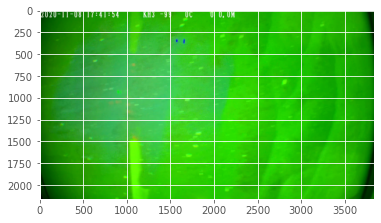

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
image =  cv2.imread("/content/drive/MyDrive/Group_Classification/input/MUD/EH_023_00001.png")


In [ ]:
image.shape

(2160, 3840, 3)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image2 = cv2.resize(image, (224,224))

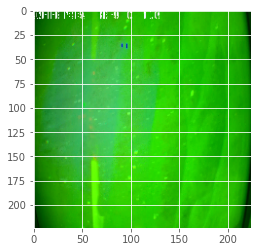

In [ ]:
plt.imshow(image2, cmap="gray")